<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/MachineLearning_DeepLearning/Study/02_%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8%EA%B3%BC_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import LinearSVC

In [2]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,181 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [2]:
# 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
pip install mglearn

     |████████████████████████████████| 542kB 7.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=cdf539611569d918cc1701aaa67f4eda096acc0621d2718e93d58cc3621ccbfe
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# 1. 선형 회귀 모델
- hypothesis : y = w[0] * x[0] + w[1] * x[1] + ... + b

w[0]: 0.393906  b: -0.031804


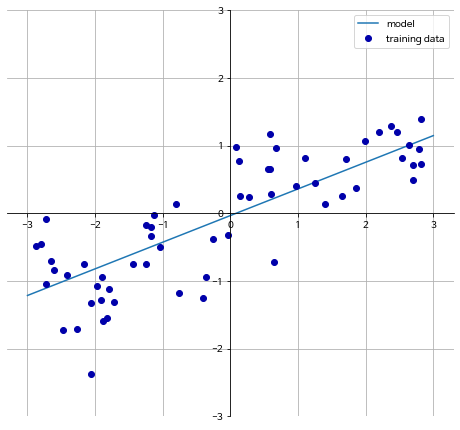

In [ ]:
mglearn.plots.plot_linear_regression_wave()

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("훈련 점수 :", lr.score(X_train, y_train))
print("테스트 점수 :", lr.score(X_test, y_test))

dir(lr)

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 : 0.6700890315075756
테스트 점수 : 0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [ ]:
##### 통계적 접근

from scipy import stats

result = stats.linregress(X_train.reshape(-1), y_train.reshape(-1))
result

LinregressResult(slope=0.39390555116733944, intercept=-0.031804343026759774, rvalue=0.8185896600297219, pvalue=6.4641460612798074e-12, stderr=0.042149264068325865)

#### 1) 사례 1 : 전기 생산량과 소비량


In [ ]:
##### 주제 : 전기 생산량과 소비량
### 귀무 가설 : 전기 생산량과 소비량은 상관 관계가 없다
### 대립 가설 : 전기 생산량과 소비량은 상관 관계가 있다

# 월별 전기 사용량(백만 Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [ ]:
### 통계적 분석

result = stats.linregress(X, y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

In [ ]:
### 머신러닝

X_arr = np.array(X)
X_arr = X_arr.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_arr, y)

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

기울기 : [0.49560324], 절편 : 0.9195814280689416


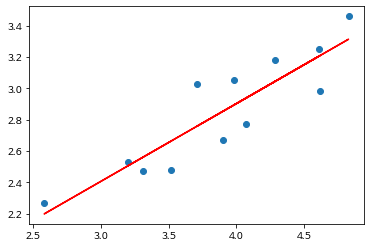

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.coef_ * X + lr.intercept_, c = "red")

In [ ]:
### 생란량이 5일때 사용량은 얼마일까?

print(lr.coef_ * 5 + lr.intercept_)
print(lr.predict([[5]]))

[3.39759761]
[3.39759761]


#### 2) 사례 2 : 보스턴 주택 가격


In [ ]:
boston = load_boston()
print(boston.data.shape)
print(boston.target)
# print(boston.data)
print(boston.feature_names)

(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 5

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2

[5 rows x 14 columns]


In [ ]:
X = boston.data
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)


훈련 점수 : 0.7434997532004697
테스트 점수 : 0.7112260057484974


#### 3) 고차원 특성에 대한 과적합

In [ ]:
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()

print(X.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 :", lr.score(X_train, y_train))
print("테스트 점수 :", lr.score(X_test, y_test))

(506, 104)
훈련 점수 : 0.9469794920108199
테스트 점수 : 0.6610321968877244


### (1) 릿지(Ridge) 회귀 모델
- L2 규제(Regularization)
- MSE항에 Penalty항을 추가
- 알파를 크게 하면 페널티의 효과가 커지고(가중치 감소), 작게하면 그 반대가 된다
- 모델을 단순하게 해주고 훈련셋에 대한 성능 차이를 절충하는 효과

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha = 1.0

print("훈련 점수 :", ridge.score(X_train, y_train))
print("테스트 점수 :", ridge.score(X_test, y_test))

훈련 점수 : 0.8636034860891285
테스트 점수 : 0.8334633607570349


In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 점수 :", ridge10.score(X_train, y_train))
print("테스트 점수 :", ridge10.score(X_test, y_test))

훈련 점수 : 0.7581351347121554
테스트 점수 : 0.7359281915527248


In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 점수 :", ridge01.score(X_train, y_train))
print("테스트 점수 :", ridge01.score(X_test, y_test))

훈련 점수 : 0.9157957696828153
테스트 점수 : 0.8355846906162856


(-15.0, 25.0)

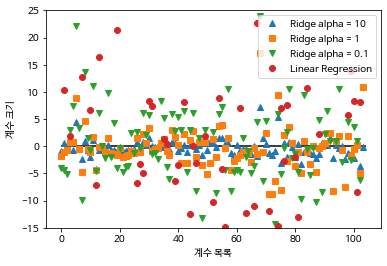

In [ ]:
plt.plot(ridge10.coef_, "^", label = "Ridge alpha = 10")
plt.plot(ridge.coef_, "s", label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, "v", label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, "o", label = "Linear Regression")

plt.legend(loc = 0)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-15, 25)

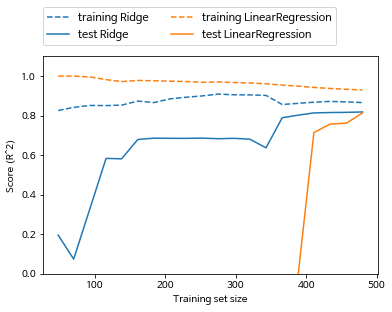

In [ ]:
# 알파값을 1로 고정한 상태에서 데이터의 크기 조절

mglearn.plots.plot_ridge_n_samples()

In [ ]:
print("사용한 특성의 수 :", np.sum(ridge.coef_ != 0))

사용한 특성의 수 : 104


### (2) 라쏘(Lasso) 회귀 모델
- L1 규제 사용
- 알파를 크게 하면 패널티의 효과가 커지고 작게하면 그 반대가 된다
- 특성 선택이 자동적으로 이루어진다

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso().fit(X_train, y_train)

print("훈련 점수 :", lasso.score(X_train, y_train))
print("테스트 점수 :", lasso.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso.coef_ != 0))

훈련 점수 : 0.26711442647227945
테스트 점수 : 0.24833962305738363
사용한 특성의 수 : 3


In [ ]:
lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train)

print("훈련 점수 :", lasso001.score(X_train, y_train))
print("테스트 점수 :", lasso001.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso001.coef_ != 0))

훈련 점수 : 0.8840251447268247
테스트 점수 : 0.8313567964465357
사용한 특성의 수 : 33


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.133286469924315, tolerance: 3.111537141242938
  positive)


In [ ]:
lasso00001 = Lasso(alpha = 0.0001).fit(X_train, y_train)

print("훈련 점수 :", lasso00001.score(X_train, y_train))
print("테스트 점수 :", lasso00001.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso00001.coef_ != 0))

훈련 점수 : 0.9389816184143889
테스트 점수 : 0.6917785046583406
사용한 특성의 수 : 103


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 971.0199247249202, tolerance: 3.111537141242938
  positive)


(-15.0, 25.0)

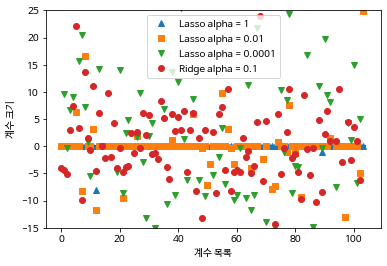

In [ ]:
plt.plot(lasso.coef_, "^", label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, "s", label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, "v", label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, "o", label = "Ridge alpha = 0.1")


plt.legend(loc = 0)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-15, 25)

### (3) 예제1

- 키에 따라 몸무게가 얼마인지 예측하는 프로그램 작성

In [ ]:
# 파일 직접 업로드하기
from google.colab import files
myfile = files.upload()

Saving heights.csv to heights.csv


In [ ]:
#io 모듈 import
import io

#pd.read_csv로 csv파일 불러오기
df = pd.read_csv(io.BytesIO(myfile['heights.csv']))
df.head()

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [ ]:
### 키가 70인 사람의 몸무게는 얼마일까?

In [ ]:
lr = LinearRegression()

In [ ]:
X, y = df["height"], df["weight"]

# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state = 42)
lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))

print("훈련 점수 :", lr.score(X.values.reshape(-1, 1), y.values.reshape(-1, 1)))
lr.predict([[70]])

훈련 점수 : 0.31009833265482645


array([[134.2596226]])

### (4) 예제2
- Boston Housing Sample

        속성	내용
        CRIM	범죄율
        ZN	25,000평방피트당 주거지역의 비율
        INDUS	비소매 상업지구 비율(단위: 에이커)
        CHAS	찰스강에 인접해 있으면 1, 그렇지 않으면 0
        NOX	일산화질소 농도(단위:0.1ppm)
        RM	주택당 방의 수
        AGE	1940년 이전에 건설된 주택의 비율
        DIS	5개의 보스턴 직업고용센터와의 거리(가중 평균)
        RAD	고속도로 접근성
        TAX	재산세율
        PTRATIO	학생/교사비율
        B	흑인비율
        LSTAT	하위계층비율
        MEDV	타운의 주택 가격 중앙값(단위: 1,000달러


In [3]:
boston = load_boston()
boston

X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target, test_size=0.3, random_state = 42)

In [4]:
boston_model = LinearRegression()
boston_model.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
boston_model = Ridge(alpha = 1)
boston_model.fit(boston.data, boston.target)

NameError: ignored

In [6]:
print("훈련 점수 :", boston_model.score(X_train, y_train))
print("테스트 점수 :", boston_model.score(X_test, y_test))

훈련 점수 : 0.73991779019738
테스트 점수 : 0.7363382906561143


In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(10)

df["MEDV"] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


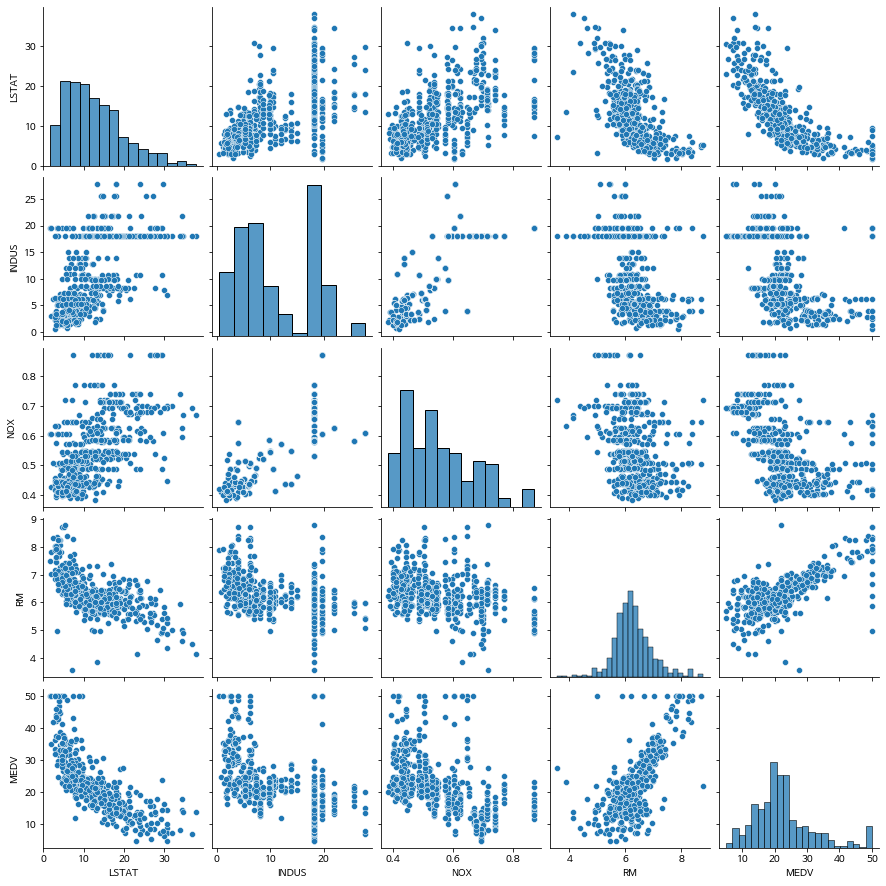

In [8]:
sns.pairplot(df[["LSTAT", "INDUS", "NOX", "RM", "MEDV"]], size = 2.5)

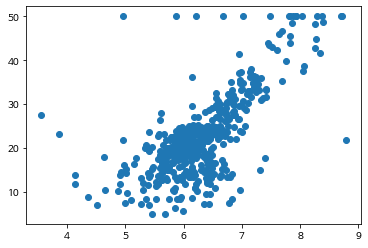

In [9]:
plt.scatter(df[["RM"]], df[["MEDV"]])

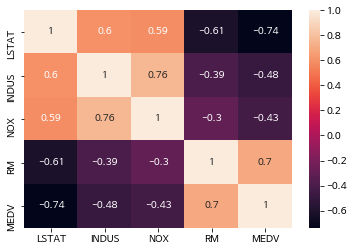

In [10]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
heat = np.corrcoef(df[cols].values.T)
sns.heatmap(heat, annot = True, yticklabels = cols, xticklabels = cols)

In [11]:
### 방이 10개일 때 집값은 얼마인가?

X, y = boston.data[:, 5], boston.target

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

print("훈련 점수 :", lr.score(X.reshape(-1, 1), y.reshape(-1, 1)))
lr.predict([[10]])

훈련 점수 : 0.4835254559913343


array([[56.35046904]])

In [ ]:
### 다차원 회귀는?

x = boston.data
y = boston.target
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### (5) 예제3
- d
        rental_id	rental ID
        rent	임대료 ($)
        bedrooms	침실수
        bathrooms	화장실수
        size_sqft	평수(feet)
        min_to_subway	지하철과의 거리 (minutes)
        floor	층수
        building_age_yrs	건물 연령
        no_fee	중계수수료 (0 for fee, 1 for no fee)
        has_roofdeck	옥상 (o for no, 1 for yes)
        has_washer_dryer	세탁기/건조기 (0/1)
        has_doorman	도어맨 (0/1)
        has_elevator	엘리베이터 (0/1)
        has_dishwasher	식기세척기 (0/1)
        has_patio	안마당(patio) (0/1)
        has_gym	헬스장(gym) (0/1)
        neighborhood	이웃 (ex: 한인타운)
        submarket	submarket (ex: North Brooklyn)
        borough	borough (ex: Brooklyn)


In [ ]:
#### 설명 계수(훈련 결과와 테스트 결과 비교)
#### 임대료 계산
#### 변수들의 관계를 시각화

In [12]:
# 파일 직접 업로드하기
from google.colab import files
myfile = files.upload()

Saving manhattan.csv to manhattan.csv


In [13]:
#io 모듈 import
import io

#pd.read_csv로 csv파일 불러오기
df = pd.read_csv(io.BytesIO(myfile['manhattan.csv']))
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [19]:
X = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

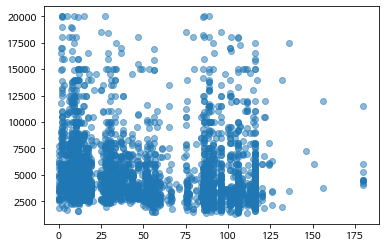

In [20]:
plt.scatter(df[["building_age_yrs"]], df[["rent"]], alpha = 0.5)

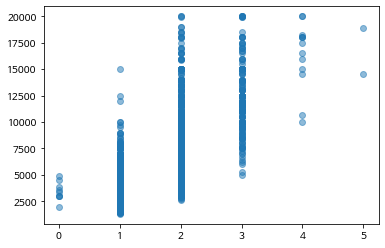

In [21]:
plt.scatter(df[["bathrooms"]], df[["rent"]], alpha = 0.5)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7741250006977438
0.7946620520475126


In [27]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = lr.predict(my_apartment)
my_predict

array([[2403.19982994]])

# 2. 로지스틱 회귀 모델
- L2 norm 규제 사용
- C 파라미터를 사용해서 규제의 강도를 설정

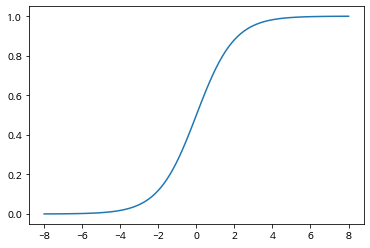

In [30]:
##### Sigmoid 그래프 그리기

def sigmoid(x):
    result = []

    for i in x:
        result.append(1/(1 + np.exp(-i)))

    return result

######################################

X = np.linspace(-8, 8, 100)
X

sig = sigmoid(X)

plt.plot(X, sig)

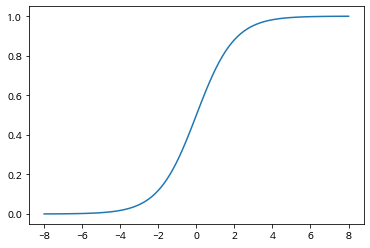

In [32]:
X = np.linspace(-8, 8, 100)
plt.plot(X, 1/(1 + np.exp(-X)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


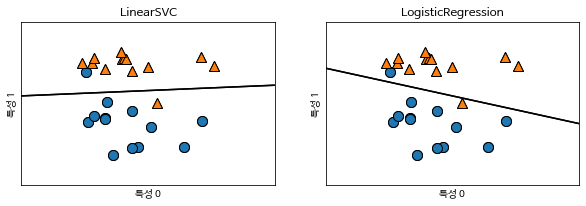

In [39]:
X, y = mglearn.datasets.make_forge()

_, axes = plt.subplots(1, 2, figsize = (10, 3))

clf1 = LinearSVC(C = 1).fit(X, y)
clf2 = LogisticRegression(C = 1).fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axes[0])
mglearn.plots.plot_2d_separator(clf1, X, ax = axes[0])

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axes[1])
mglearn.plots.plot_2d_separator(clf2, X, ax = axes[1])

for model, ax in zip([LinearSVC(C = 1), LogisticRegression(C = 1)], axes):
    clf = model.fit(X, y)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax)

    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

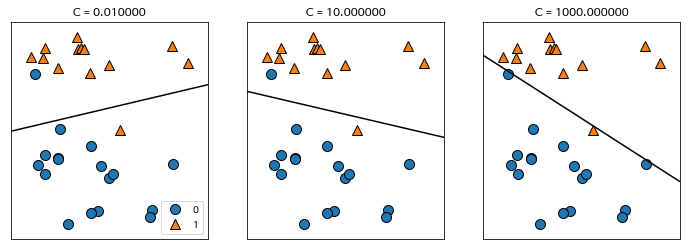

In [40]:
mglearn.plots.plot_linear_svc_regularization()

### (1) C값에 따른 결과

In [41]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

In [47]:
logreg = LogisticRegression(C = 1, penalty = "l2", max_iter = 10000).fit(X_train, y_train)
print("훈련 점수 :", logreg.score(X_train, y_train))
print("테스트 점수 :", logreg.score(X_test, y_test))

훈련 점수 : 0.9577464788732394
테스트 점수 : 0.965034965034965


In [48]:
logreg100 = LogisticRegression(C = 100, penalty = "l2", max_iter = 10000).fit(X_train, y_train)
print("훈련 점수 :", logreg100.score(X_train, y_train))
print("테스트 점수 :", logreg100.score(X_test, y_test))

훈련 점수 : 0.9788732394366197
테스트 점수 : 0.965034965034965


In [49]:
logreg001 = LogisticRegression(C = 0.01, penalty = "l2", max_iter = 10000).fit(X_train, y_train)
print("훈련 점수 :", logreg001.score(X_train, y_train))
print("테스트 점수 :", logreg001.score(X_test, y_test))

훈련 점수 : 0.9460093896713615
테스트 점수 : 0.972027972027972


(-5.0, 5.0)

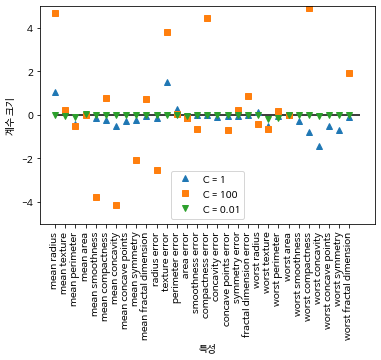

In [51]:
plt.plot(logreg.coef_.T, "^", label = "C = 1")
plt.plot(logreg100.coef_.T, "s", label = "C = 100")
plt.plot(logreg001.coef_.T, "v", label = "C = 0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)

plt.legend(loc = 0)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

In [53]:
logreg_l1 = LogisticRegression(C = 1, penalty = "l1", max_iter = 10000, solver = "liblinear").fit(X_train, y_train)
print("훈련 점수 :", logreg_l1.score(X_train, y_train))
print("테스트 점수 :", logreg_l1.score(X_test, y_test))

훈련 점수 : 0.960093896713615
테스트 점수 : 0.958041958041958


In [54]:
logreg100_l1 = LogisticRegression(C = 100, penalty = "l1", max_iter = 10000, solver = "liblinear").fit(X_train, y_train)
print("훈련 점수 :", logreg100_l1.score(X_train, y_train))
print("테스트 점수 :", logreg100_l1.score(X_test, y_test))

훈련 점수 : 0.9882629107981221
테스트 점수 : 0.972027972027972


In [55]:
logreg001_l1 = LogisticRegression(C = 0.01, penalty = "l1", max_iter = 10000, solver = "liblinear").fit(X_train, y_train)
print("훈련 점수 :", logreg001_l1.score(X_train, y_train))
print("테스트 점수 :", logreg001_l1.score(X_test, y_test))

훈련 점수 : 0.9107981220657277
테스트 점수 : 0.951048951048951


### (2) KNN, LogisticRegression, LinearSVC 성능 비교

In [59]:
cancer.data.shape
cancer.feature_names
cancer.target_names # malignant(악성), benign(양성)
np.bincount(cancer.target)


In [72]:
##### LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)
model = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.965034965034965


In [87]:
##### LinearSVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

scores = []
for i in range(10):
    model = LinearSVC(max_iter = 100000, dual = False).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(np.mean(np.array(scores)))

0.965034965034965


In [74]:
##### KNN
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)
model = KNeighborsClassifier().fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.965034965034965


([<matplotlib.axis.XTick at 0x7f9fbe6fb5d0>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
 

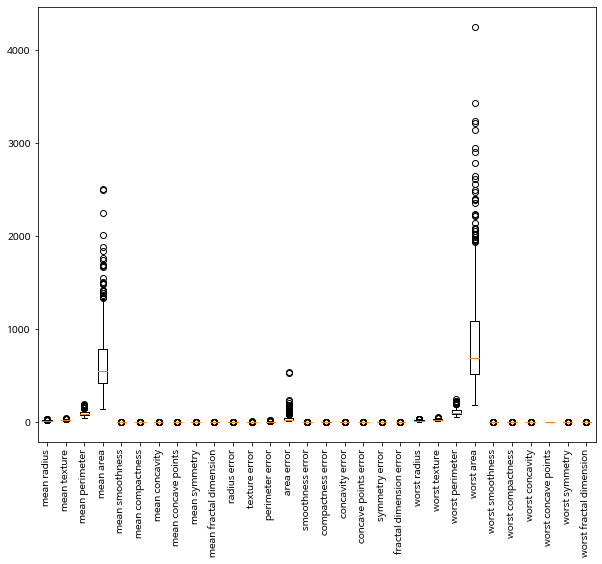

In [70]:
##### 이상치

plt.figure(figsize = (10, 8))
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation = 90)

In [67]:
##### Standardization

m = cancer.data.mean(axis = 0)
s = cancer.data.std(axis = 0)

data1 = (cancer.data - m) / s

([<matplotlib.axis.XTick at 0x7f9fbd7a2190>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
 

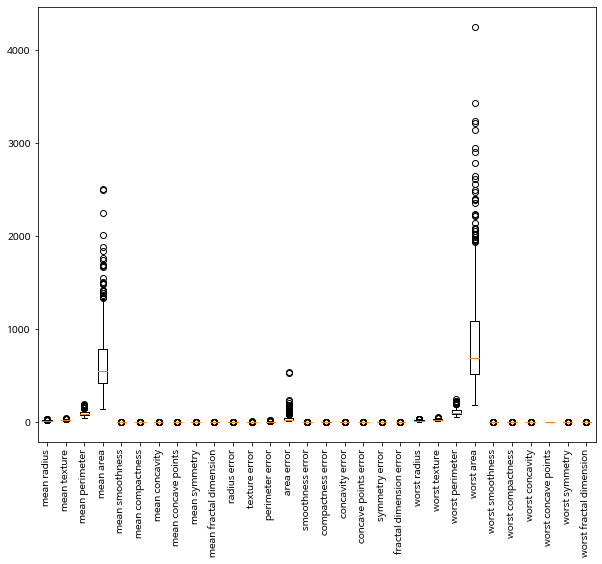

In [71]:
plt.figure(figsize = (10, 8))
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation = 90)

In [88]:
##### LogisticRegression에 표준화 적용
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state = 42)

model = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)


0.9790209790209791


In [89]:
##### LinearSVC에 표준화 적용
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state = 42)

model = LinearSVC(max_iter = 10000, dual = False).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)


0.965034965034965


In [90]:
##### KNN에 표준화 적용
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state = 42)

model = KNeighborsClassifier().fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.958041958041958


In [95]:
##### C값 조정

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state = 42)

model = LogisticRegression(C = 0.1, max_iter = 10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.9020979020979021


In [97]:
##### C값 조정

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state = 42)

model = LinearSVC(C = 0.01, max_iter = 10000, dual = False).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.993006993006993


# 3. 다중 클래스 분류

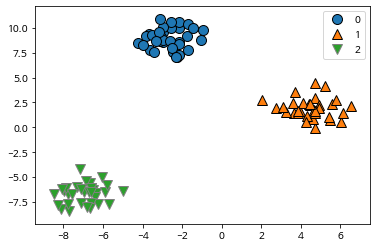

In [100]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend()

In [101]:
model = LinearSVC().fit(X, y)
print(model.coef_)

[[-0.17492136  0.23140449]
 [ 0.47621688 -0.06937083]
 [-0.18914318 -0.20399626]]


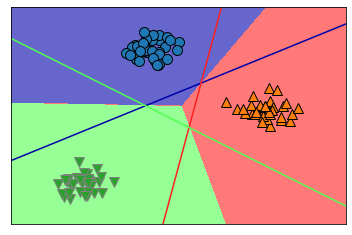

In [103]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
xline = np.linspace(-15, 15)

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    plt.plot(xline, -(xline*coef[0] + intercept) / coef[1], c = color)

mglearn.plots.plot_2d_classification(model, X, fill=True, alpha=0.6)

# 4. 평가
- 정확도(Accuracy)
- 정밀도(Precision)
- 재현율(Recall)
- F1 score
- ROC, AUC
- 오차 행렬(Confusion Matrix)


### (1) 정확도
- 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [105]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.data)
print(digits.target)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [106]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [110]:
y = (digits.target == 7).astype(int)
print(pd.Series(y).value_counts())
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 42)

print(len(X_train), len(X_test))
print(pd.Series(y_test).value_counts())

0    1618
1     179
dtype: int64
1347 450
0    409
1     41
dtype: int64


In [ ]:
from sklearn import BaseEstimator

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)